---
# DS3000A - DS9000A Final Exam

## Student ID #: XXXXXXXXX

## Grade: __ / 100 + 10 Bonus

## General Comments

-   This exam integrates knowledge and skills acquired in the whole term. You are allowed to use any document and source on your computer and the internet, but you are NOT allowed to share documents, post questions to online forums, or communicate in any way with people inside or outside the class. 

-   Having any document sharing or communication tool (e.g. Discord, Teams, Outlook, Google Drive etc.), either web-based or app-based, open on your laptop (or running in the background) is considered act of cheating and you will receive 0 pts for the exam.

-   To finish the midterm in the alloted time, you will have to work efficiently. Read the entirety of each question carefully.

-   You need to submit your final notebook by 1:00PM on OWL to the Test and Quizzes section, this is the same place where you downloaded the empty notebook and data. Late submission will be scored with 0 pts. To avoid technical difficulties, start your submission, at the latest, five to ten minutes before the deadline.  

-   Some questions demand a **written answer** - answer these in full English sentences in markdown cells. 

-   For your figures, ensure that all axes are labeled in an informative way. There might be a situation where you should limit the x-axis and/or the y-axis to zoom-in for interpretation.

-   Ensure that your code runs correctly by choosing "Kernel -> Restart and Run All" before submitting to OWL. 

## Additional Guidance

-   If at any point you are asking yourself "are we supposed to...", write your assumptions clearly and proceed according to those assumptions.
-   If you have no clue how to approach a question, skip it and move on. Revisit the skipped one(s) after you are done with the rest.

---
## Preliminaries
Feel free to add stuff below. However, be mindful of every question's requirements as some may restrict using certain functions.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_squared_error, silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LinearRegression, RidgeCV, SGDClassifier
from sklearn.ensemble import RandomForestRegressor

from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Dense

seed=1220
np.random.seed(seed)

import warnings 
warnings.filterwarnings('ignore')

2022-12-20 05:40:51.396193: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-20 05:41:12.286126: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11/lib64
2022-12-20 05:41:12.286604: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11/lib64
2022-12-20 05:41:12.286640: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:

---
## Question 1 - <span style="color:green">[60]</span> - Model Selection 
You are going to work on a dataset listing the soccer players participated in the 2022 FIFA World Cup. Our ultimate goal is to find the best ML model (amongst four candidates) that can best predict a player's monetary value. The dataset has the following attributes:
- `Age`: Player age in years
- `Nationality`: Players nationality
- `Overall`: Player overall performance score (higher better)
- `Potential`: Player potential score (higher better)
- `Club`: Player home soccer club
- `Value`: Player value *i.e*, the amount of money in euros a club should pay in order to purchase the player (higher better)
- `Wage`: Player stipend in euros (higher better)
- `Preferred Foot`: Player preferred foot to play
- `International Reputation`: Player international fame (higher better)
- `Week Foot`: Performance score of player weak foot (higher better)
- `Skill Moves`: Player move skill score (higher better)
- `Body Type`: Player body type
- `Position`: Position player holds on the pitch
- `Height`: Player height in centimeters
- `Weight`: Player weight in kilograms

Q 1.1 - <span style="color:red">[0.5]</span> - Load `dataset_1.csv` as a pandas dataframe, name it `data`, and display its first 5 rows.

In [ ]:
data = pd.read_csv('./dataset_1.csv')
data.head()

,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Position,Height,Weight
0,27,Portugal,86,87,Manchester United,78500000.0,190000.0,Right,3.0,3.0,4.0,Stocky,Middle,179,69
1,30,Argentina,85,85,Sevilla FC,46500000.0,46000.0,Left,2.0,3.0,3.0,Stocky,Back,172,69
2,31,Belgium,91,91,Manchester City,107500000.0,350000.0,Right,4.0,5.0,4.0,Stocky,Middle,181,70
3,25,Italy,86,89,Inter,89500000.0,110000.0,Right,3.0,3.0,3.0,Normal,Middle,172,68
4,27,Germany,89,90,FC Bayern München,105500000.0,130000.0,Right,4.0,4.0,3.0,Normal,Middle,177,75


Q 1.2 - <span style="color:red">[1]</span> - Code to answer the following questions:
-   Does the data contain any missing value(s)? How do you take care of them? <span style="color:red">[0.5]</span>
-   Do you see any suspicious value(s) in the statistical summary of the data? If so, explain why suspicious and take care of them properly? <span style="color:red">[0.5]</span>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4903 entries, 0 to 4902
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       4903 non-null   int64  
 1   Nationality               4903 non-null   object 
 2   Overall                   4903 non-null   int64  
 3   Potential                 4903 non-null   int64  
 4   Club                      4903 non-null   object 
 5   Value                     4903 non-null   float64
 6   Wage                      4903 non-null   float64
 7   Preferred Foot            4903 non-null   object 
 8   International Reputation  4903 non-null   float64
 9   Weak Foot                 4903 non-null   float64
 10  Skill Moves               4903 non-null   float64
 11  Body Type                 4903 non-null   object 
 12  Position                  4903 non-null   object 
 13  Height                    4903 non-null   int64  
 14  Weight  

In [ ]:
data.describe()

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Height,Weight
count,4903.000000,4903.000000,4903.000000,4.903000e+03,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000
mean,25.751581,69.188864,73.407098,5.931980e+06,15037.344483,1.210891,2.992046,2.514787,181.053437,75.154803
std,4.483194,7.005289,6.593820,1.271123e+07,29897.342606,0.572371,0.689830,0.804754,6.979453,7.048869
min,16.000000,47.000000,51.000000,1.000000e+03,500.000000,1.000000,1.000000,1.000000,156.000000,49.000000
25%,22.000000,64.000000,69.000000,7.750000e+05,1000.000000,1.000000,3.000000,2.000000,176.000000,70.000000
50%,25.000000,69.000000,73.000000,1.700000e+06,4000.000000,1.000000,3.000000,2.000000,181.000000,75.000000
75%,29.000000,74.000000,78.000000,4.500000e+06,16000.000000,1.000000,3.000000,3.000000,186.000000,80.000000
max,44.000000,91.000000,95.000000,1.905000e+08,450000.000000,5.000000,5.000000,5.000000,206.000000,102.000000


Q 1.3 - <span style="color:red">[2]</span> - The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of $kg/m^2$. With this knowledge, see if you can do some meaningful feature extraction? 

In [ ]:
data['BMI'] = data.Weight / (data.Height / 100)**2
data.drop(['Weight', 'Height'], axis=1, inplace=True)

Q 1.4 - <span style="color:red">[4]</span> - Use `sns.jointplot` to investigate the following relationships and apply proper transformations where needed:
- Value vs. Wage
- Value vs. Overall
- Wage vs. Overall
- Value vs. Potential
- Wage vs. Potential

Note: Where transformation is needed, use `sns.jointplot` twice (*i.e.*, before and after transformation).

Hint: Where transformation is needed, replace the original values of the attribute in the dataset with their transformed version.  

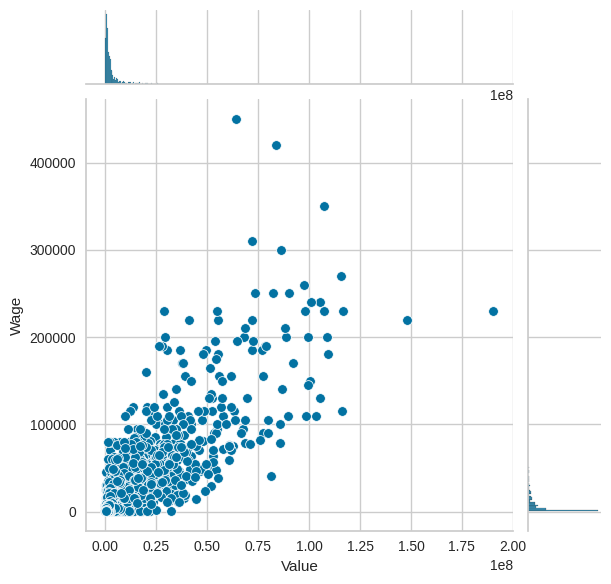

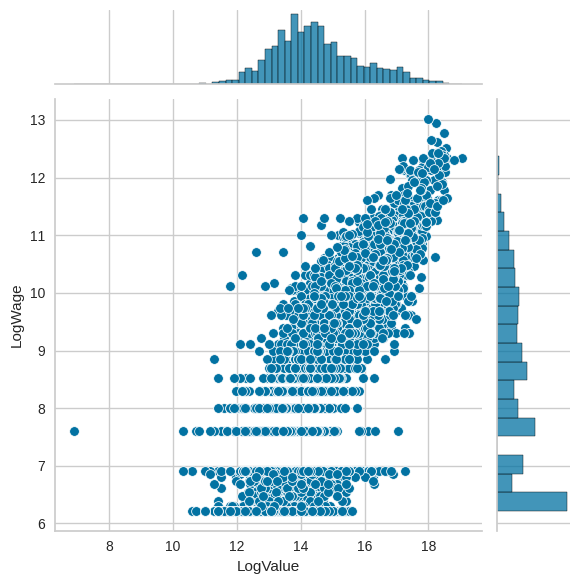

In [ ]:
ax = sns.jointplot(x=data.Value, y=data.Wage, kind='scatter')
ax.ax_joint.set_xlabel('Value')
ax.ax_joint.set_ylabel('Wage')
plt.show()

data['LogValue'] = np.log(data.Value)
data['LogWage'] = np.log(data.Wage)
ax = sns.jointplot(x=data.LogValue, y=data.LogWage, kind='scatter')
ax.ax_joint.set_xlabel('LogValue')
ax.ax_joint.set_ylabel('LogWage')
plt.show()

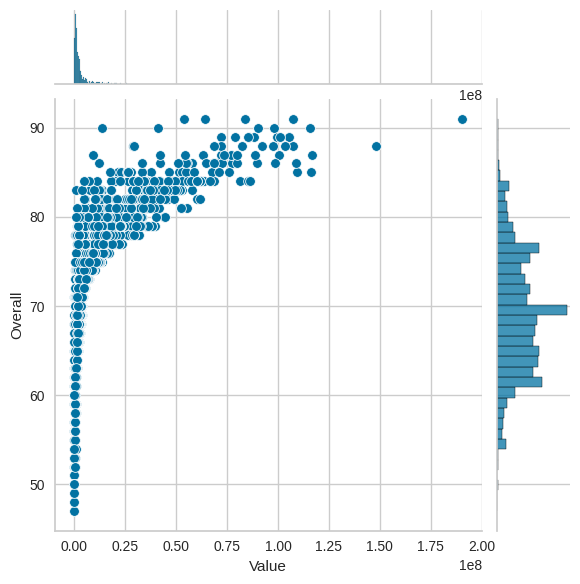

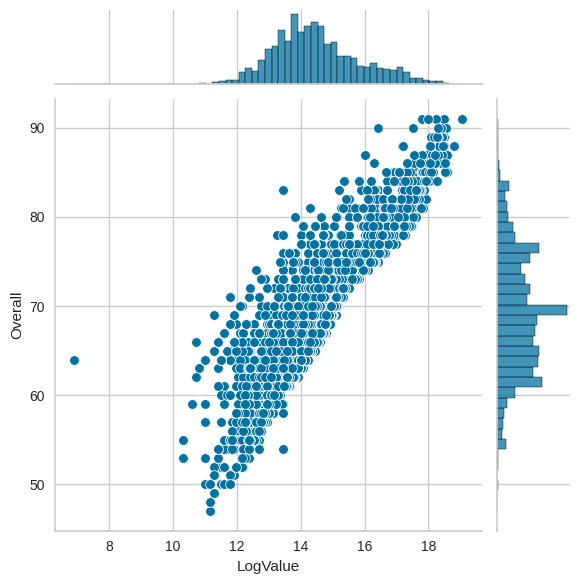

In [ ]:
ax = sns.jointplot(x=data.Value, y=data.Overall, kind='scatter')
ax.ax_joint.set_xlabel('Value')
ax.ax_joint.set_ylabel('Overall')
plt.show()

ax = sns.jointplot(x=data.LogValue, y=data.Overall, kind='scatter')
ax.ax_joint.set_xlabel('LogValue')
ax.ax_joint.set_ylabel('Overall')
plt.show()

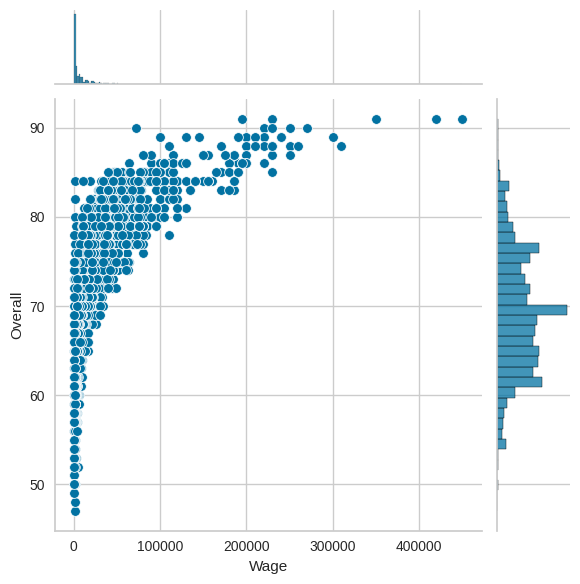

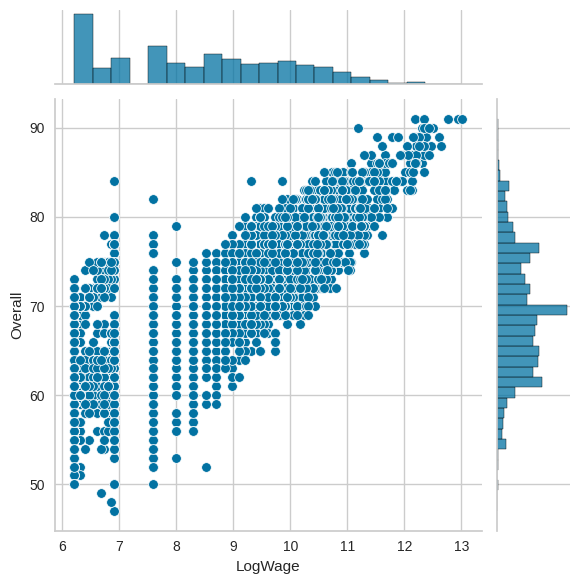

In [ ]:
ax = sns.jointplot(x=data.Wage, y=data.Overall, kind='scatter')
ax.ax_joint.set_xlabel('Wage')
ax.ax_joint.set_ylabel('Overall')
plt.show()

ax = sns.jointplot(x=data.LogWage, y=data.Overall, kind='scatter')
ax.ax_joint.set_xlabel('LogWage')
ax.ax_joint.set_ylabel('Overall')
plt.show()

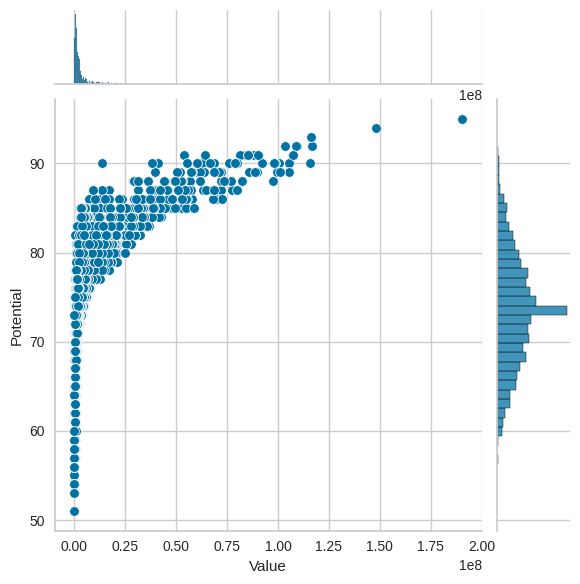

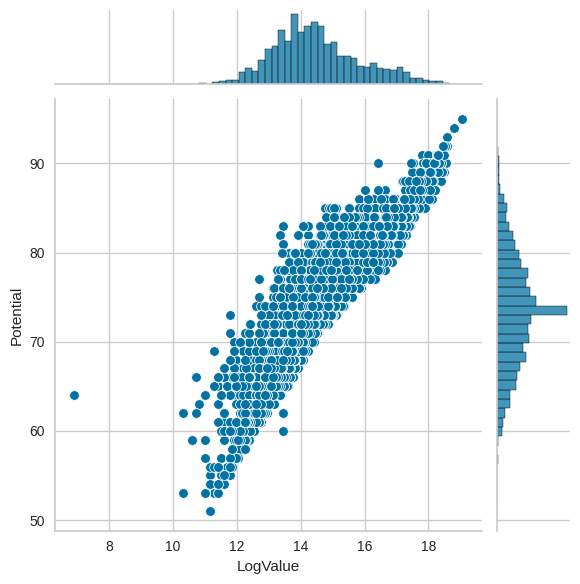

In [ ]:
ax = sns.jointplot(x=data.Value, y=data.Potential, kind='scatter')
ax.ax_joint.set_xlabel('Value')
ax.ax_joint.set_ylabel('Potential')
plt.show()

ax = sns.jointplot(x=data.LogValue, y=data.Potential, kind='scatter')
ax.ax_joint.set_xlabel('LogValue')
ax.ax_joint.set_ylabel('Potential')
plt.show()

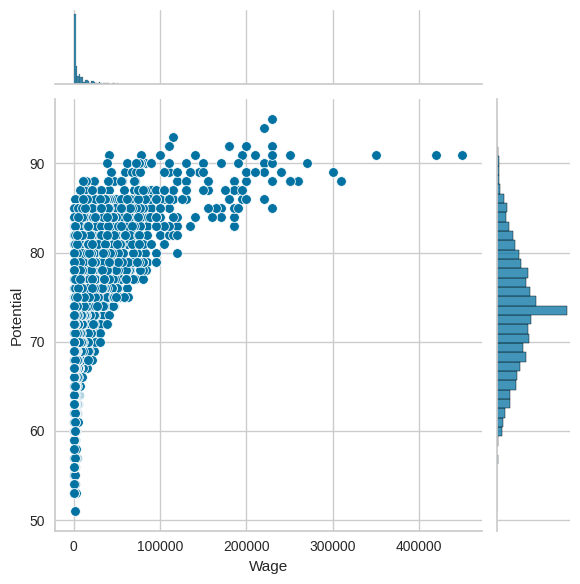

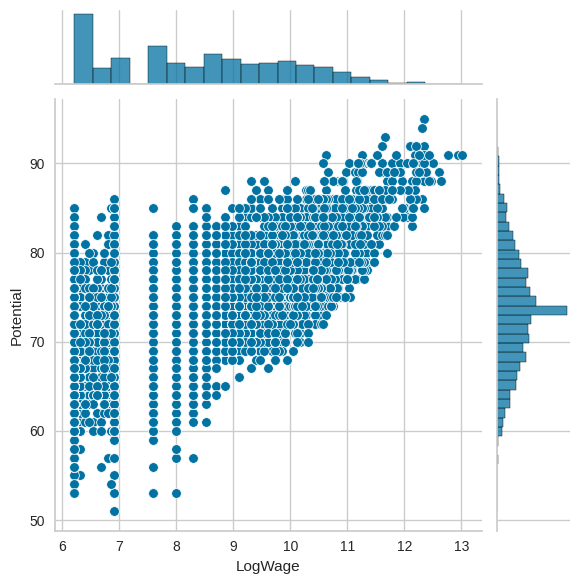

In [ ]:
ax = sns.jointplot(x=data.Wage, y=data.Potential, kind='scatter')
ax.ax_joint.set_xlabel('Wage')
ax.ax_joint.set_ylabel('Potential')
plt.show()

ax = sns.jointplot(x=data.LogWage, y=data.Potential, kind='scatter')
ax.ax_joint.set_xlabel('LogWage')
ax.ax_joint.set_ylabel('Potential')
plt.show()

Q 1.5 - <span style="color:red">[2]</span> - Output a table reporting in descending format the correlations between the numerical features and target.  

In [ ]:
D = data.drop(['Value', 'Wage'], axis=1, inplace=False)
c = D.corr()
print("Correlations between features and target (i.e., LogValue) are:")
print(c["LogValue"].sort_values(ascending=False).round(2))

Correlations between features and target (i.e., LogValue) are:
LogValue                    1.00
Overall                     0.91
Potential                   0.90
LogWage                     0.79
International Reputation    0.46
Skill Moves                 0.38
Weak Foot                   0.23
Age                         0.01
BMI                         0.00
Name: LogValue, dtype: float64


Q 1.6 - <span style="color:red">[6]</span> - Code the following:
-   use pandas `get_dummies` to take care of the categorical variables (if any), <span style="color:red">[2]</span>
-   at this point, before proceeding to the next step, store the dataframe with a unique name because you will need it again in **Question 1.14 and 1.15**. <span style="color:red">[1]</span>
-   use `train_test_split` with `random_state=seed` to put aside 20% of the data for testing purpose, <span style="color:red">[1]</span>
-   define an RMSE scorer function. <span style="color:red">[2]</span>

In [ ]:
df1 = pd.get_dummies(D, drop_first=True)

X = df1.drop(['LogValue'], axis=1)
y = df1.LogValue

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=seed)

# RMSE scorer
def sc(y,ypr):
    return mean_squared_error(y, ypr, squared=False)

Q 1.7 - <span style="color:red">[4]</span> - Do the following:
-   instantiate an sklearn's linear regression with the default arguments and name it `model1`, <span style="color:red">[0.5]</span>
-   run shuffled 5-split Kfold cross-validation on `model1` and report the cross-validated RMSE of each split as well as their mean and standard deviation <span style="color:red">[1]</span>
-   fit the model, <span style="color:red">[0.5]</span>
-   report prediction RMSE score, <span style="color:red">[0.5]</span>
-   report generalization RMSE score, <span style="color:red">[0.5]</span>
-   get the fitted coefficients from `model1` and use `sns.barplot` to see in descending order the 5 features that the model deems as the most important ones. (Take the absolute values of the coefficients because we just want to see the most correlated ones and do not care whether they are positively correlated or negatively). <span style="color:red">[1]</span>

List of CV losses: [3.48000000e-01 7.97765336e+08 5.15006697e+10 2.79000000e-01
 5.87750731e+08]
Average CV loss: 10577237156.244 +/- 20464169331.534
Prediction RMSE: 0.203
Generalization RMSE: 13052695526.312


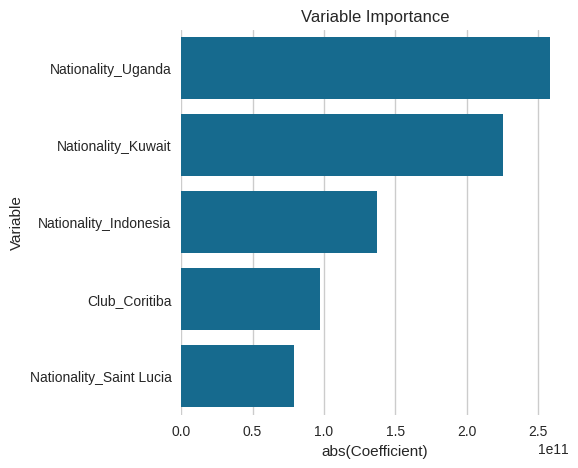

In [ ]:
model1 = LinearRegression()

model = model1
# KFold cross-validated loss with shuffling
kf = KFold(n_splits=5, shuffle=True, random_state=seed)
cv_scores = cross_val_score(model, Xtrain, ytrain, cv=kf, scoring=make_scorer(sc))
print(f'List of CV losses:', cv_scores.round(3))
print(f"Average CV loss: %.3f +/- %.3f" % (cv_scores.mean(), cv_scores.std()))

model.fit(Xtrain, ytrain)
print("Prediction RMSE: %.3f" % sc(ytrain, model.predict(Xtrain)))

Loss_Test = sc(ytest, model.predict(Xtest))
print('Generalization RMSE:', Loss_Test.round(3))

coef = abs(model.coef_)
indices = np.argsort(coef)[::-1][0:5]
f, ax = plt.subplots(figsize=(5, 5))
plt.title("Variable Importance")
sns.barplot(y=[list(Xtrain.columns)[i] for i in indices], x=coef[indices], label="Total", color="b")
ax.set(ylabel="Variable", xlabel="abs(Coefficient)")
sns.despine(left=True, bottom=True)

Q 1.8 - <span style="color:red">[5]</span> - Do the following:
-   Bundle the `StandardScaler` with the sklearn's cross-validated ridge linear regression into a `Pipeline` and name it `model2` (for the regressor use the default arguments except `alpha = [1e-10, 1e-5, 1]` and `store_cv_values=True`), <span style="color:red">[1]</span>
-   run shuffled 5-split Kfold cross-validation on `model2` and report the cross-validated RMSE of each split as well as their mean and standard deviation, <span style="color:red">[1]</span>
-   fit the model, <span style="color:red">[0.5]</span>
-   report prediction RMSE score, <span style="color:red">[0.5]</span>
-   report generalization RMSE score, <span style="color:red">[0.5]</span>
-   which entry in the `alpha` list did the model select for training? <span style="color:red">[0.5]</span>
-   get the fitted coefficients from `model2` and use `sns.barplot` to see in descending order the 5 features that the model deems as the most important ones. (Take the absolute values of the coefficients because we just want to see the most correlated ones and do not care whether they are positively correlated or negatively). <span style="color:red">[1]</span>

List of CV losses: [0.349 0.274 0.265 0.296 0.279]
Average CV loss: 0.293 +/- 0.030
Prediction RMSE: 0.260
Generalization RMSE: 0.316
Alpha value of 1e-10 was used for training.


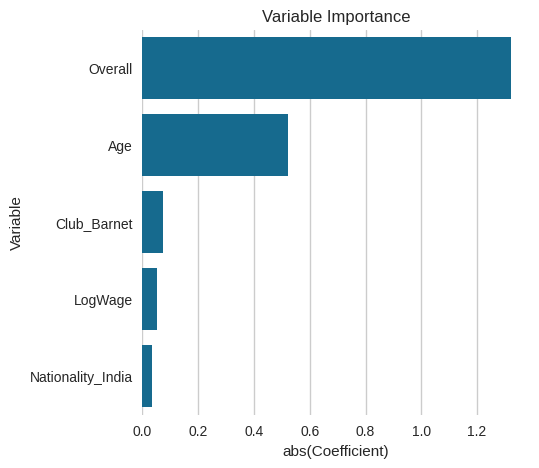

In [ ]:
alpha = [1e-10, 1e-5, 1]
model2 = Pipeline(steps=[('Standardization', StandardScaler()), ('RegLR', RidgeCV(alphas=alpha, store_cv_values=True))])

model = model2
# KFold cross-validated loss with shuffling
kf = KFold(n_splits=5, shuffle=True, random_state=seed)
cv_scores = cross_val_score(model, Xtrain, ytrain, cv=kf, scoring=make_scorer(sc))

print(f'List of CV losses:', cv_scores.round(3))
print(f"Average CV loss: %.3f +/- %.3f" % (cv_scores.mean(), cv_scores.std()))

model.fit(Xtrain, ytrain)
print("Prediction RMSE: %.3f" % sc(ytrain, model.predict(Xtrain)))

Loss_Test = sc(ytest, model.predict(Xtest))
print('Generalization RMSE:', Loss_Test.round(3))

print("Alpha value of {} was used for training.".format(alpha[(np.mean(model['RegLR'].cv_values_, axis=0).argmin())]))

coef = abs(model['RegLR'].coef_)
indices = np.argsort(coef)[::-1][0:5]
f, ax = plt.subplots(figsize=(5, 5))
plt.title("Variable Importance")
sns.barplot(y=[list(Xtrain.columns)[i] for i in indices], x=coef[indices], label="Total", color="b")
ax.set(ylabel="Variable", xlabel="abs(Coefficient)")
sns.despine(left=True, bottom=True)

Q 1.9 - <span style="color:red">[4]</span> - Do the following:
-   instantiate an sklearn's random forest regressor with the default arguments except `n_jobs=-1,` and `random_state=seed` and name it `model3`, <span style="color:red">[0.5]</span>
-   run shuffled 5-split Kfold cross-validation on `model3` and report the cross-validated RMSE of each split as well as their mean and standard deviation, <span style="color:red">[1]</span>
-   fit the model, <span style="color:red">[0.5]</span>
-   report prediction RMSE score,  <span style="color:red">[0.5]</span>
-   report generalization RMSE score, <span style="color:red">[0.5]</span>
-   how many trees this forest has? <span style="color:red">[0.5]</span>
-   use `barplot` to generate a variable (or feature) importance diagram from this model (limit the plot to the top 5 features). <span style="color:red">[0.5]</span>

List of CV losses: [0.282 0.164 0.158 0.164 0.156]
Average CV loss: 0.185 +/- 0.049
Prediction RMSE: 0.069
Generalization RMSE: 0.159


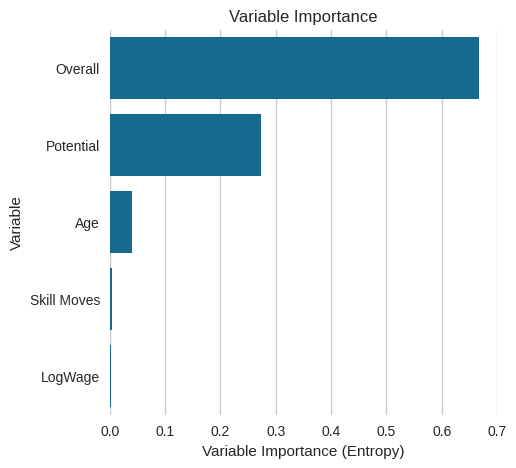

In [ ]:
model3 = RandomForestRegressor(n_jobs=-1, random_state=seed)

model=model3
# KFold cross-validated loss with shuffling
kf = KFold(n_splits=5, shuffle=True, random_state=seed)
cv_scores = cross_val_score(model, Xtrain, ytrain, cv=kf, scoring=make_scorer(sc))
print(f'List of CV losses:', cv_scores.round(3))
print(f"Average CV loss: %.3f +/- %.3f" % (cv_scores.mean(), cv_scores.std()))

model.fit(Xtrain, ytrain)
print("Prediction RMSE: %.3f" % sc(ytrain, model.predict(Xtrain)))

Loss_Test = sc(ytest, model.predict(Xtest))
print('Generalization RMSE:', Loss_Test.round(3))

importances = model.feature_importances_
indices = np.argsort(importances)[::-1][0:5] 
f, ax = plt.subplots(figsize=(5, 5))
plt.title("Variable Importance")
sns.barplot(y=[model.feature_names_in_[i] for i in indices], x=importances[indices], label="Total", color="b")
ax.set(ylabel="Variable", xlabel="Variable Importance (Entropy)")
sns.despine(left=True, bottom=True)

Q 1.10 - <span style="color:red">[2]</span> - Use the cross-validated grid search function to find the best possible values for `n_estimators` and `max_features` for the random forest. Here are the degrees of freedom to use: For `n_estimators` try `[50, 100, 150]`, and for `max_features` try every possible method.

Note: Only use 50% of total data (randomly sampled using the provided random seed) to fit the grid search function.

In [ ]:
params = dict({'n_estimators': [50, 100, 150],
               'max_features': ['sqrt', 'log2', None]})

gs = GridSearchCV(RandomForestRegressor(random_state=seed),         
                  params,              # Parameter grid
                  cv = 5,              # Cross-validation object.  
                  scoring = 'neg_root_mean_squared_error',
                  n_jobs = -1,         # Parallel jobs. -1 is "all you have"
                  refit = False,       # If refit at the end with the best. We'll do it manually.
                  verbose = 0          # If to show what it is doing.
                 )

val_train = df1.sample(frac = 0.5, random_state = seed)
gs.fit(val_train.drop(['LogValue'], axis=1), val_train.LogValue)
gs.best_params_

{'max_features': None, 'n_estimators': 150}

Q 1.11 - <span style="color:red">[4]</span> - Do the following:
-   Take the random forest again but this time use the best values found in the previous step (again with `n_jobs=-1,` and `random_state=seed`), and name it `model4`, <span style="color:red">[1]</span>
-   run shuffled 5-split Kfold cross-validation on `model4` and report the cross-validated RMSE of each split as well as their mean and standard deviation, <span style="color:red">[1]</span>
-   fit the model, <span style="color:red">[0.5]</span>
-   report prediction RMSE score, <span style="color:red">[0.5]</span>
-   report generalization RMSE score, <span style="color:red">[0.5]</span>
-   use `barplot` to generate a variable (or feature) importance diagram from this model (limit the plot to the top 5 features). <span style="color:red">[0.5]</span>

List of CV losses: [0.28  0.164 0.155 0.162 0.156]
Average CV loss: 0.184 +/- 0.048
Prediction RMSE: 0.067
Generalization RMSE: 0.159


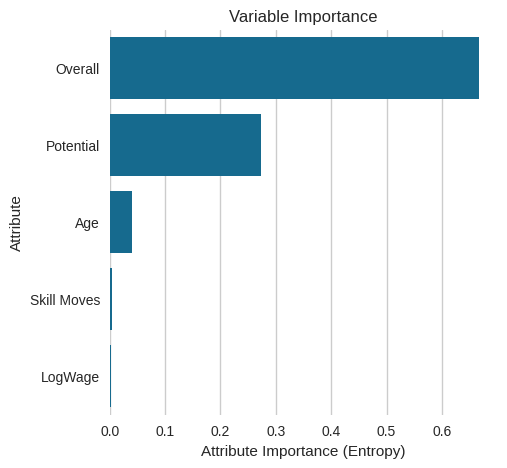

In [ ]:
model4 = RandomForestRegressor(n_estimators=gs.best_params_.get('n_estimators'),
                               max_features=gs.best_params_.get('max_features'),
                               n_jobs=-1,
                               random_state=seed)

model = model4
# KFold cross-validated loss with shuffling
kf = KFold(n_splits=5, shuffle=True, random_state=seed)
cv_scores = cross_val_score(model, Xtrain, ytrain, cv=kf, scoring=make_scorer(sc))
print(f'List of CV losses:', cv_scores.round(3))
print(f"Average CV loss: %.3f +/- %.3f" % (cv_scores.mean(), cv_scores.std()))

model.fit(Xtrain, ytrain)
print("Prediction RMSE: %.3f" % sc(ytrain, model.predict(Xtrain)))

Loss_Test = sc(ytest, model.predict(Xtest))
print('Generalization RMSE:', Loss_Test.round(3))

importances = model.feature_importances_
indices = np.argsort(importances)[::-1][0:5] 
f, ax = plt.subplots(figsize=(5, 5))
plt.title("Variable Importance")
sns.barplot(y=[model.feature_names_in_[i] for i in indices], x=importances[indices], label="Total", color="b")
ax.set(ylabel="Attribute", xlabel="Attribute Importance (Entropy)")
sns.despine(left=True, bottom=True)

Q 1.12 - <span style="color:red">[1]</span> - Based on your results, what features do you think are the most important ones? Which model do you trust for this purpose and why?


SOLUTION:

Model1 CV Loss (10577237156.244 +/- 20464169331.534) $>$ Model2 CV Loss (0.293 +/- 0.030) $>$ Model3 CV Loss (0.185 +/- 0.049) $>$ Model4 CV Loss (0.184 +/- 0.048)

Model4 is a Random Forest and has better performance scores compared to our other candidates. According to Model4 `Overall`, `Potential`, `Age`, `Skill Moves`, and `Wage` are the most important features. 

Q 1.13 - <span style="color:red">[1.5]</span> - If you are asked to choose one final model for production, which one would you select? Explain why? Note: To answer this, take computational complexity into account alongside other criteria.

SOLUTION:

Based on how one argues, any of the last three models (*i.e.*, Model2, Model3, Model4) can be acceptable.

Q 1.14 - <span style="color:red">[10]</span> - Take the dataframe that you set aside in **Question 1.6** for this question. With `International Reputation` as label attempt to do nonlinear dimension reduction using 3-component t-SNE with `learning_rate='auto'`, `init='random`, `perplexity=50`, `random_state=seed`, and `n_jobs=-1`. You will probably witness better separations with higher values of `n_iter`, however, for the sake of computation time do not go beyond 1500 . There is no deterministic outcome to expect from this question. As long as your implementation is correct, you should get the full mark. Treat this as an **unsupervised** task. Do the following:
-   instantiate a t-SNE model with proper arguments, <span style="color:red">[2]</span>
-   fit the model properly, <span style="color:red">[2]</span>
-   3D scatter plot the components that you get after dimension reduction and name the axes properly, <span style="color:red">[3]</span>
-   use the label to color code the data points in your 3D plot. <span style="color:red">[2]</span>
-   why t-SNE uses t-distribution and not Gaussian? <span style="color:red">[1]</span>

Note: If you do not know how to plot in 3D, do 2D for partial mark.

Text(0.5, 0, 'Component 3')

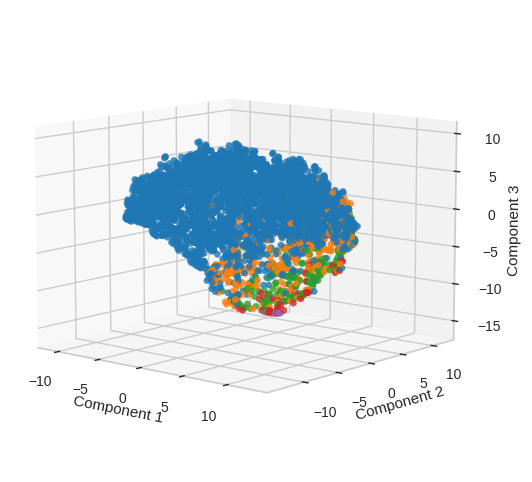

In [ ]:
label = 'International Reputation'

tSNEmapper = TSNE(n_components=3,
                  n_iter=1500,  
                  learning_rate='auto',
                  init='random',
                  perplexity=50,    
                  random_state=seed,
                  n_jobs=-1,        
                 )

TSNE_embedding = tSNEmapper.fit_transform(df1.drop([label], axis=1, inplace=False))

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)

colors = {1:'tab:blue', 2:'tab:orange', 3:'tab:green', 4:'tab:red', 5:'tab:purple'}
ax.scatter(TSNE_embedding[:, 0], TSNE_embedding[:, 1], TSNE_embedding[:, 2], alpha=0.8, c=df1[label].map(colors))
ax.view_init(azim=-50, elev=10)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

# Gaussian has a short tail and because of that it creates a crowding problem.

Q 1.15 - <span style="color:red">[5]</span> - Take the dataframe that you set aside in **Question 1.6** for this question. We want to do a classification with `'International Reputation'` as target class. This is going to be an imbalanced classification but we don't care. We are interested to see if can get a better accuracy score if we do some clustering as a preprocessing step. Do the following:
-   what would be the classification baseline accuracy for this dataframe? <span style="color:red">[1]</span>
-   use `train_test_split` with `random_state=seed` to set aside 20% of the data as test set, <span style="color:red">[0.5]</span>
-   instantiate a sklearn's stochastic gradient descent classifier with the proper solver for logistic regression and name it `clf`. Use elasticnet regularization with `l1_ratio` of 0.7. Set `max_iter=2000`, `tol=1e-3`, `n_jobs=-1`, `random_state=seed`, <span style="color:red">[2]</span>
-   run 5-split `StratifiedKFold` cross-validation on `clf` and report the cross-validated **accuracy** of each fold as well as their mean and standard deviation, <span style="color:red">[1.5]</span>

In [ ]:
# label = 'International Reputation'
# c, n = np.unique(df1[label], return_counts=True)
# fig, ax = plt.subplots(figsize=(4, 3))
# sns.histplot(df1[label]).plot(ax=ax)
# plt.xlabel('Class')
# plt.show()

counts= df1[label].value_counts()
baseline_accuracy = counts.iloc[0]/counts.sum()
print("Baseline Accuracy: %.3f" % baseline_accuracy)

X = df1.drop([label], axis=1, inplace=False)
y = df1[label]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=seed)

Baseline Accuracy: 0.855


In [ ]:
clf = SGDClassifier(loss='log_loss',  penalty="elasticnet", l1_ratio=0.7, max_iter=2000, tol=1e-3, n_jobs=-1, random_state=seed)

cv_scores = cross_val_score(clf, Xtrain, ytrain, cv=StratifiedKFold(n_splits=5), n_jobs=-1, scoring="accuracy")
print(f'List of CV scores:', cv_scores.round(3))
print(f"Average CV score: %.3f +/- %.3f" % (cv_scores.mean(), cv_scores.std()))

List of CV scores: [0.85  0.868 0.866 0.86  0.844]
Average CV score: 0.857 +/- 0.009


Q 1.16 - <span style="color:red">[8]</span> - Do the following:
-   bundle a 50-cluster `K-Means` (as a preprocessing step) and the `clf` into a pipeline. Set `random_state=seed` for `K-Means`, <span style="color:red">[3]</span>
-   run 5-split `StratifiedKFold` cross-validation on the pipeline and report the cross-validated **accuracy** of each fold as well as their mean and standard deviation, <span style="color:red">[2]</span>
-   do you find the added preprocessing step effective? why? <span style="color:red">[1]</span>
-   what transformations did the data undergo through this pipeline? <span style="color:red">[2]</span>


In [ ]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=seed)),
    ("log_reg", clf),
])

cv_scores = cross_val_score(pipeline, Xtrain, ytrain, cv=StratifiedKFold(n_splits=5), n_jobs=-1, scoring="accuracy")
print(f'List of CV scores:', cv_scores.round(3))
print(f"Average CV score: %.3f +/- %.3f" % (cv_scores.mean(), cv_scores.std()))

List of CV losses: [0.841 0.868 0.86  0.883 0.857]
Average CV loss: 0.862 +/- 0.014


---
## Question 2 - <span style="color:green">[40]</span> - Clustering 
For this question we use a modified dataset from UCI Machine Learning Datasets. The data contains selling features on a social media platform. Each record has information about the time the information was posted and engagements such as emotion.

Q 2.1 - <span style="color:red">[1]</span> - Load `dataset_2.csv` as a pandas dataframe, name it `df2`, and display its first 5 rows.

In [ ]:
df2 = pd.read_csv('dataset_2.csv')
df2.head()

,ID,data_type,data_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


Q 2.2 - <span style="color:red">[8]</span> - Do the following:
-   How many observations and attributes do you see in the dataset? <span style="color:red">[1]</span>
-   Check for missing values and drop the columns that contain missing values. <span style="color:red">[1]</span>
-   Create a label encoder using `LabelEncoder` from sklearn and convert the categorical variable into numerics. <span style="color:red">[2]</span>
-   Keep a copy of the encoded version of `df2['data_type']` under a different name (*e.g.*, `y`) - you will need it in **Question 2.6** as true label. <span style="color:red">[1]</span>
-   Explain why it is a good idea to normalize the data for K-Means clustering. <span style="color:red">[1]</span>
-   Train a `MinMaxScaler` over the full dataset but not `y`. <span style="color:red">[2]</span>

In [ ]:
print(df2.shape)

# find missing values 
df2.isnull().sum()
df2.drop(['data_published','ID'], axis=1, inplace=True)
df2.isnull().sum()

(7050, 12)


data_type        0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64

In [ ]:
df2.select_dtypes("object").columns

Index(['data_type'], dtype='object')

In [ ]:
df2['data_type'].value_counts()

photo     4288
video     2334
status     365
link        63
Name: data_type, dtype: int64

In [ ]:
X = df2
y = df2['data_type']
le = LabelEncoder()

X['data_type'] = le.fit_transform(X['data_type'])
y = le.transform(y)

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)
X.head()

,data_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


Q 2.3 - <span style="color:red">[4]</span> - Now that the data is ready let's use `KMeans` with `random_state=seed` to plot k versus inertia for the model. Take k in `[2, 3, 4, 5, 6, 8]`.

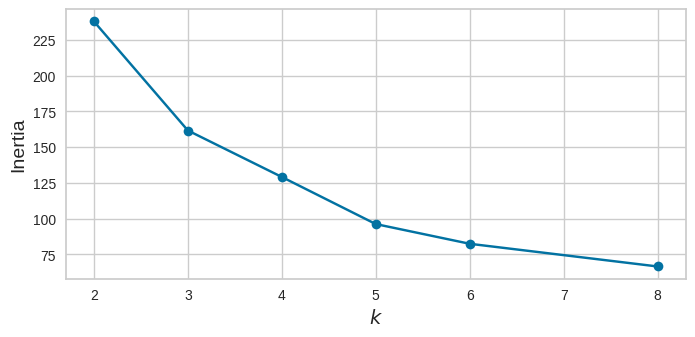

In [ ]:
c = [2, 3, 4, 5, 6, 8]
kmeans_per_k = [KMeans(n_clusters=k, random_state=seed).fit(X) for k in c]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(c, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

Q 2.4 - <span style="color:red">[4]</span> - Plot k versus silhouette score for the model fit in the previous question.

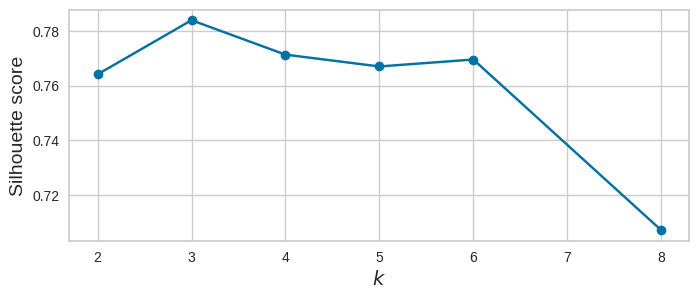

In [ ]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k]

plt.figure(figsize=(8, 3))
plt.plot(c, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

Q 2.5 - <span style="color:red">[5]</span> - According to the plots of **Question 2.3** and **Question 2.4** select 4 values for k and generate Silhouette Diagrams for them.  

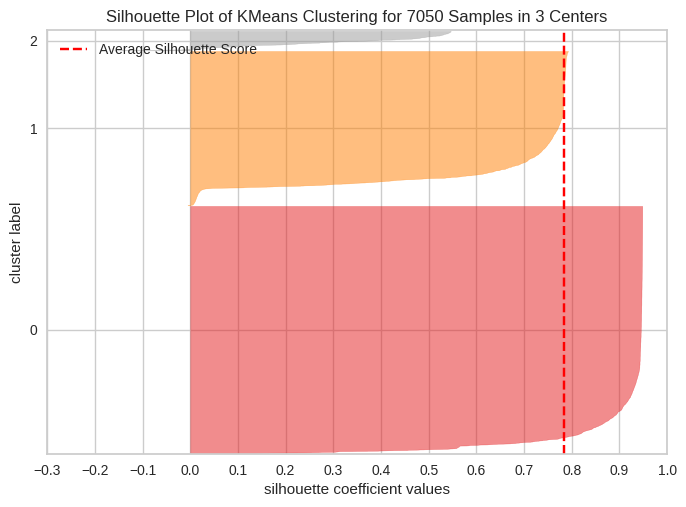

0.7838777714764834


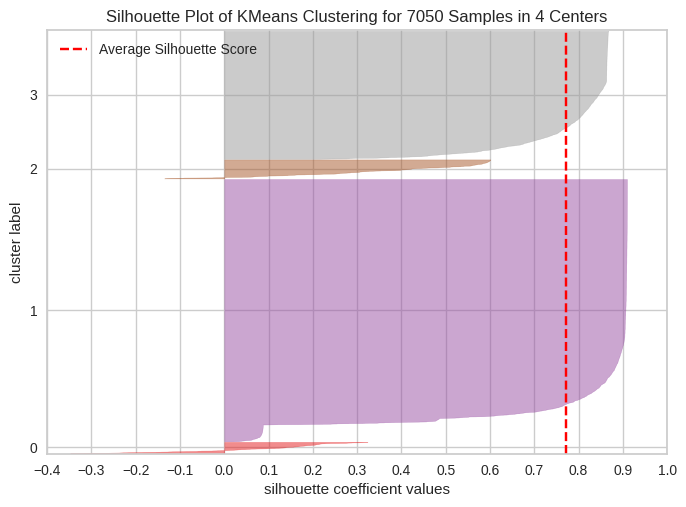

0.7712981059679503


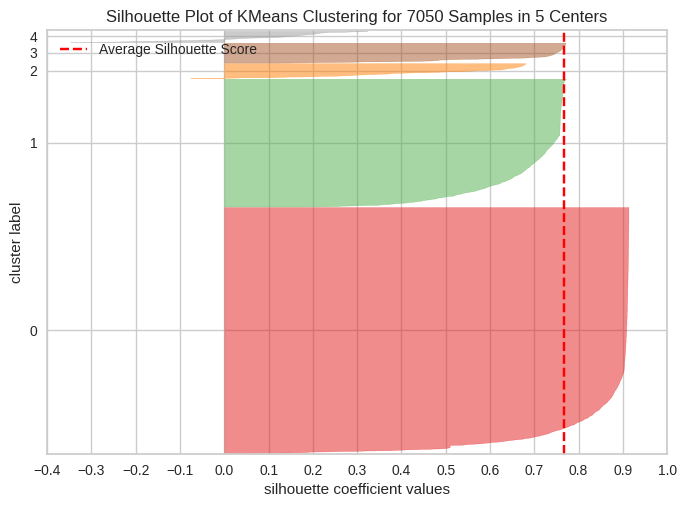

0.7669770951371734


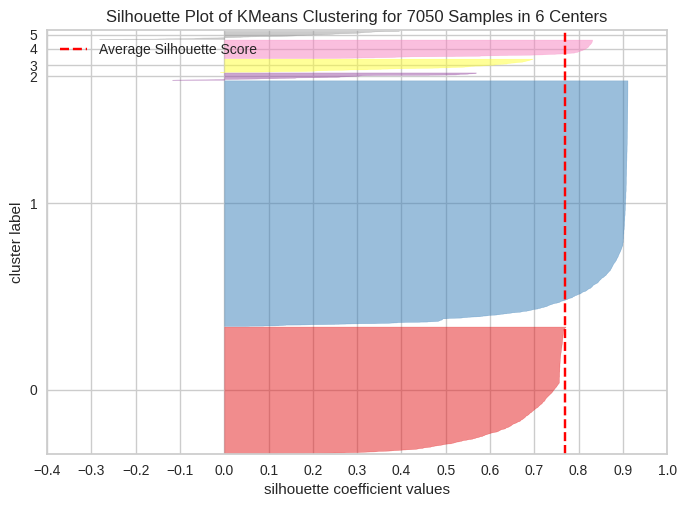

0.7695163927339362


In [ ]:
for k in [3,4,5,6]:
  kmeans = KMeans(n_clusters=k, random_state=seed)
  visualizer = SilhouetteVisualizer(kmeans)
  visualizer.fit(X)
  visualizer.show()
  print(silhouette_score(X, kmeans.labels_))
  plt.show()

Q 2.6 - <span style="color:red">[5]</span> - Train the model (using the same seed) for the k's that you selected in the previous question and report the model accuracy per k. Hint: In order to calculate the number of correct cluster labels you can use the data that you set aside in **Question 2.2** as true label for this question.

In [ ]:
for k in [3,4,5,6]:
    kmeans = KMeans(n_clusters=k, random_state=seed).fit(X)

    # check how many of the samples were correctly labeled
    labels = kmeans.labels_

    correct_labels = sum(y == labels)
    print('k=',k)
    print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
    print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))
    print('-----')

k= 3
Result: 138 out of 7050 samples were correctly labeled.
Accuracy score: 0.02
-----
k= 4
Result: 6294 out of 7050 samples were correctly labeled.
Accuracy score: 0.89
-----
k= 5
Result: 82 out of 7050 samples were correctly labeled.
Accuracy score: 0.01
-----
k= 6
Result: 4134 out of 7050 samples were correctly labeled.
Accuracy score: 0.59
-----


Q 2.7 - <span style="color:red">[3]</span> - Based on the insights generated in **Question 2.3 - 2.6**, pick two values for **k**. Explain why and support your choices by the results.

SOLUTION:

Based on their previous results and how they argue, any two choices from this list [3, 4, 5, 6] should be a viable answer.

Q 2.8 - <span style="color:red">[6]</span> - Do the following:
-   In **Question 2.2**, you used `MinMaxScaler`. This time, instead of `MinMaxScaler`, use the `StandardScaler()` to prepare the data once again. Train `KMeans` on this data with `random_state=seed` and number of clusters being equal to your first choice for **k**. <span style="color:red">[3]</span>
-   Apply a PCA transform to the data using 3 components and create a 3D scatter plot, differentiating data points by color. <span style="color:red">[3]</span>

Note: If you do not know how to plot in 3D, do 2D for partial mark.

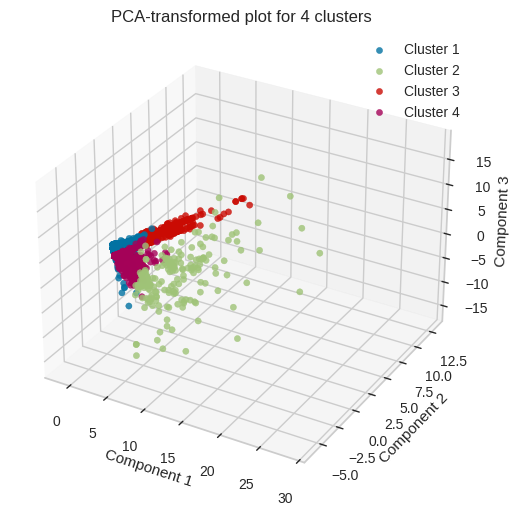

In [ ]:
X = df2
y = df2['data_type']
le = LabelEncoder()

X['data_type'] = le.fit_transform(X['data_type'])
y = le.transform(y)

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)


# Final choice of number of clusters
n_clusters = 4
clusterer = KMeans(n_clusters=n_clusters, random_state=seed)
cluster_labels = clusterer.fit_predict(X)

# Calculate PCA
PCA_transformer = PCA(3)
PCA_data = PCA_transformer.fit_transform(X)


fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)

for i in range(n_clusters):
    ax.scatter(PCA_data[cluster_labels==i, 0], PCA_data[cluster_labels==i, 1], PCA_data[cluster_labels==i, 2], alpha=0.8, label='Cluster %i' % (i+1))

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.title('PCA-transformed plot for %i clusters' % n_clusters)
plt.legend()
plt.show()

Q 2.9 - <span style="color:red">[3]</span> - Retrain the `KMeans` with number of clusters being equal to your second choice for k, and again apply a PCA transform to the data using 3 components and create a 3D scatter plot, differentiating data points by color.

Note: If you do not know how to plot in 3D, do 2D for partial mark.

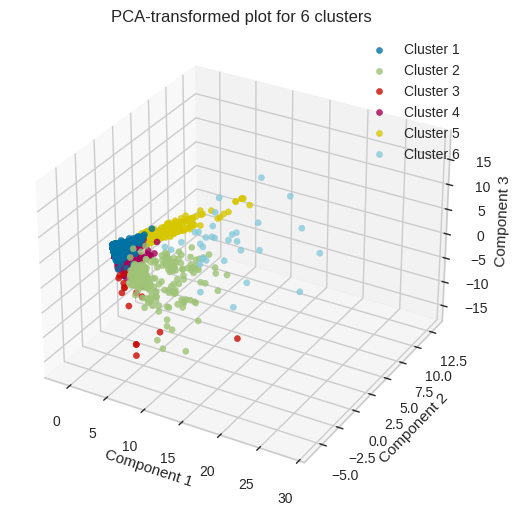

In [ ]:
# Final choice of number of clusters
n_clusters = 6
clusterer = KMeans(n_clusters=n_clusters, random_state=seed)
cluster_labels = clusterer.fit_predict(X)

# Calculate PCA
PCA_transformer = PCA(3)
PCA_data = PCA_transformer.fit_transform(X)


fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)

for i in range(n_clusters):
    ax.scatter(PCA_data[cluster_labels==i, 0], PCA_data[cluster_labels==i, 1], PCA_data[cluster_labels==i, 2], alpha=0.8, label='Cluster %i' % (i+1))

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.title('PCA-transformed plot for %i clusters' % n_clusters)
plt.legend()
plt.show()

Q 2.10 - <span style="color:red">[1]</span> - After seeing the figures generated in **Question 2.8** and **2.9**, what value of **k** would be your ultimate choice? Explain. 

SOLUTION:

Any answer can be deemed correct as long as it is supported by correct interpretation of the PC diagrams.

---
## Question 3 - <span style="color:green">[10 Bonus]</span> - ANN
Let's use the same dataset as **Question 1** to train an ANN to predict players values. You can use either PyTorch or TensorFlow.  

Q 3.1 - <span style="color:red">[2]</span> - Load `dataset_1.csv` as a pandas dataframe, create the array of features `X` and target `y`. Use `train_test_split` with `random_state=seed,test_size=0.3` twice to get not only a training set and a test set but also a validation set. Use `StandardScaler()` to transform X's.

In [ ]:
df3 = pd.read_csv('./dataset_1.csv')

df3 = pd.get_dummies(df3, drop_first=True)

X = df3.drop(['Value'], axis=1, inplace=False)
y = df3['Value']

X_train_full, X_test,  y_train_full, y_test  = train_test_split(X, y, random_state=seed, test_size=0.3)
X_train,      X_valid, y_train,      y_valid = train_test_split(X_train_full, y_train_full,   random_state=seed, test_size=0.3)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test  = scaler.transform(X_test)

Q 3.2 - <span style="color:red">[3]</span> - Create an ANN with 4 layers:
-   An input layer with 500 nodes
-   A hidden layer with 100 nodes
-   Another hidden layer with 50 nodes
-   A single node output layer

It is up to you where and what type of activation function to use.

How many parameters your ANN must optimize?


In [ ]:
model = Sequential()
model.add(Dense(500, input_dim=X.shape[1], activation= "relu")) #layer 1
model.add(Dense(100, activation= "relu")) #layer 2
model.add(Dense(50,  activation= "relu")) #layer 3
model.add(Dense(1)) # output layer
model.summary()

2022-12-20 05:44:18.546881: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-20 05:44:19.409329: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11/lib64
2022-12-20 05:44:19.425130: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-12-20 05:44:19.607695: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlo

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               498500    
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 553,701
Trainable params: 553,701
Non-trainable params: 0
_________________________________________________________________


Q 3.3 - <span style="color:red">[3]</span> - Choose `mean_squared_error` for loss and train the model (with `epochs=20`) over training and validation sets.

In [ ]:
model.compile(loss= "mean_squared_error" , optimizer="adam")#, metrics=["mean_squared_error"])
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
76/76 [==============================] - 2s 9ms/step - loss: 212895656837120.0000 - val_loss: 137512496398336.0000
Epoch 2/20
76/76 [==============================] - 0s 7ms/step - loss: 212709748506624.0000 - val_loss: 137114482114560.0000
Epoch 3/20
76/76 [==============================] - 1s 7ms/step - loss: 211060665614336.0000 - val_loss: 134692758093824.0000
Epoch 4/20
76/76 [==============================] - 1s 7ms/step - loss: 204621217792000.0000 - val_loss: 127319976968192.0000
Epoch 5/20
76/76 [==============================] - 1s 7ms/step - loss: 188457427140608.0000 - val_loss: 111107440115712.0000
Epoch 6/20
76/76 [==============================] - 1s 7ms/step - loss: 159684317151232.0000 - val_loss: 88214962438144.0000
Epoch 7/20
76/76 [==============================] - 1s 7ms/step - loss: 123329289650176.0000 - val_loss: 67396991713280.0000
Epoch 8/20
76/76 [==============================] - 1s 7ms/step - loss: 95473406836736.0000 - val_loss: 59253742108672.0

Q 3.4 - <span style="color:red">[1]</span> - Report both prediction and generalization loss of the model.

In [ ]:
pred_train= model.predict(X_train)
print(mean_squared_error(y_train, pred_train, squared=False))

pred= model.predict(X_test)
print(mean_squared_error(y_test, pred, squared=False))

76/76 [==============================] - 0s 1ms/step
6320367.852295702
46/46 [==============================] - 0s 1ms/step
8605897.276027385


Q 3.5 - <span style="color:red">[1]</span> - Plot the learning curve *i.e.*, epoch vs training loss and validation loss.

           loss      val_loss
0  2.128957e+14  1.375125e+14
1  2.127097e+14  1.371145e+14
2  2.110607e+14  1.346928e+14


<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Epoch'>

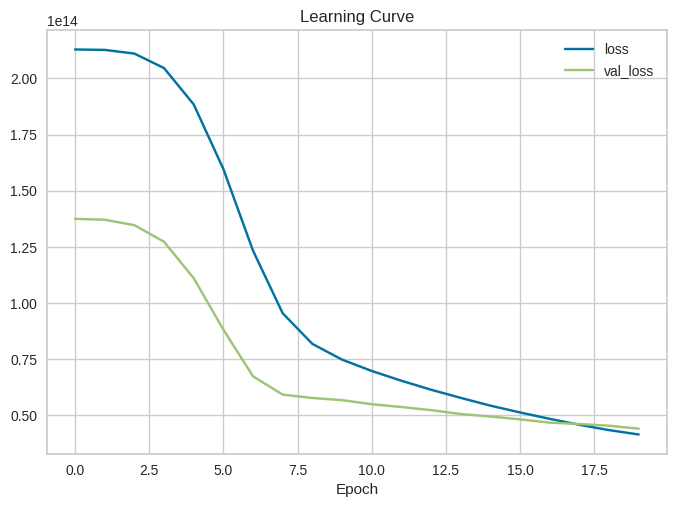

In [ ]:
l = pd.DataFrame(history.history)
print(l.head(3))
l.plot(title="Learning Curve", xlabel="Epoch")

---
# Warning!

Upload your complete notebook to the same place on OWL where you initially downloaded it. After uploading, click the "Submit for Grading" button and confirm. Late submissions are not allowed, so please start the submission process 10 minutes before the deadline.